In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_excel('Copper import Forecasting.xlsx')
df_total = df[df['Country/Region'] == 'Total'].drop(columns=['Country/Region', 'Total'])

In [ ]:
df

,Country/Region,Jan-2017,Feb-2017,Mar-2017,Apr-2017,May-2017,Jun-2017,Jul-2017,Aug-2017,Sep-2017,...,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024,Total
0,Total,580.20,677.53,448.19,639.47,680.15,601.01,749.21,724.32,691.04,...,927.86,1348.98,1408.99,1184.95,1518.36,1252.22,1529.28,1217.93,953.81,74143.17
1,JAPAN,6.16,4.02,6.54,9.03,9.06,7.11,14.20,23.82,31.77,...,180.55,310.05,78.93,138.08,204.44,231.69,166.00,319.29,28.38,8961.21
2,CHILE,67.33,153.24,29.09,102.26,90.38,85.69,142.96,162.09,147.48,...,161.68,256.66,159.84,42.47,78.67,294.23,63.27,190.57,211.95,8182.15
3,TANZANIA REP,0.29,0.10,0.30,0.18,0.65,0.17,1.11,0.39,0.18,...,130.92,124.21,312.15,246.21,184.34,201.95,200.51,143.58,124.24,6103.67
4,INDONESIA,27.74,168.65,19.15,35.64,120.78,88.91,57.09,46.20,21.53,...,0.51,196.52,145.05,43.44,174.90,1.00,140.14,0.62,38.86,5530.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,MONGOLIA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
174,MYANMAR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
175,PAKISTAN IR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
176,SERBIA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
df_long = df_total.melt(var_name='Date_Str', value_name='Value')

In [ ]:
df_long['Date'] = pd.to_datetime(df_long['Date_Str'], format='%b-%Y')
df_long = df_long.sort_values('Date').set_index('Date')
series = df_long['Value']

In [ ]:
df_long.head(10)

,Date_Str,Value
Date,,
2017-01-01,Jan-2017,580.20
2017-02-01,Feb-2017,677.53
2017-03-01,Mar-2017,448.19
2017-04-01,Apr-2017,639.47
2017-05-01,May-2017,680.15
2017-06-01,Jun-2017,601.01
2017-07-01,Jul-2017,749.21
2017-08-01,Aug-2017,724.32
2017-09-01,Sep-2017,691.04


In [ ]:
result = adfuller(series.dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}") # data is stationary d=0

ADF Statistic: -0.8533
p-value: 0.8029


In [ ]:
series_first_difference =series - series.shift(1)
series_second_difference = series_first_difference - series_first_difference.shift(1)
result = adfuller(series_second_difference.dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}") # data is non-stationary d=1

ADF Statistic: -9.1519
p-value: 0.0000


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

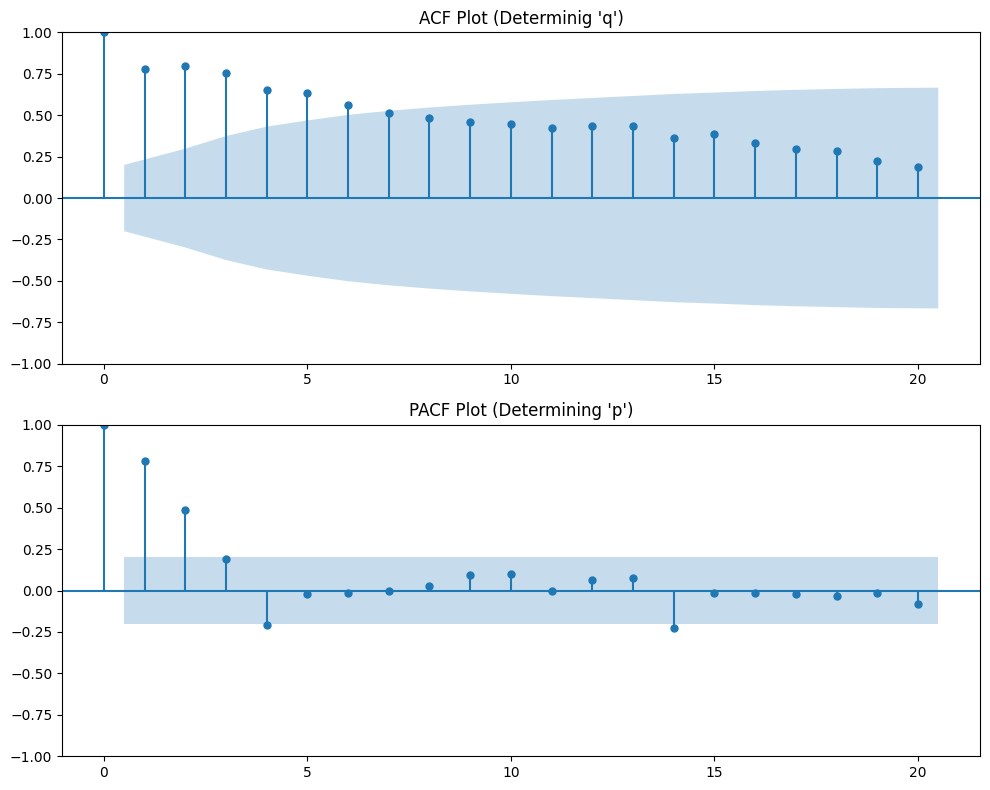

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF (Determine q)
plot_acf(series, lags=20, ax=ax1, title="ACF Plot (Determinig 'q')") # q=3

# Plot PACF (Determine p)
plot_pacf(series, lags=20, ax=ax2, title="PACF Plot (Determining 'p')") # p=2

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

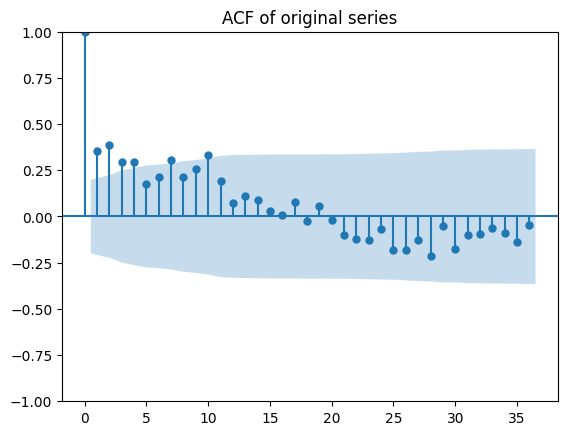

In [ ]:
s=12
plt.figure(figsize=(10,4))
plot_acf(series, lags=3*s)
plt.title("ACF of original series")
plt.show()

In [ ]:
seasonal_diff = series.diff(s).dropna()

<Figure size 1000x400 with 0 Axes>

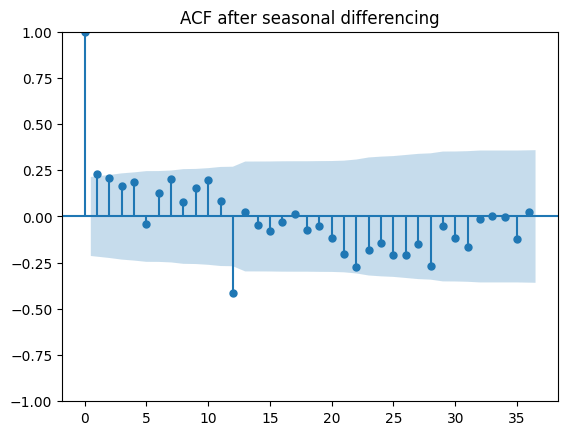

In [ ]:
plt.figure(figsize=(10,4))
plot_acf(seasonal_diff, lags=3*s)
plt.title("ACF after seasonal differencing")
plt.show()

In [ ]:
final_series = seasonal_diff


<Figure size 1200x500 with 0 Axes>

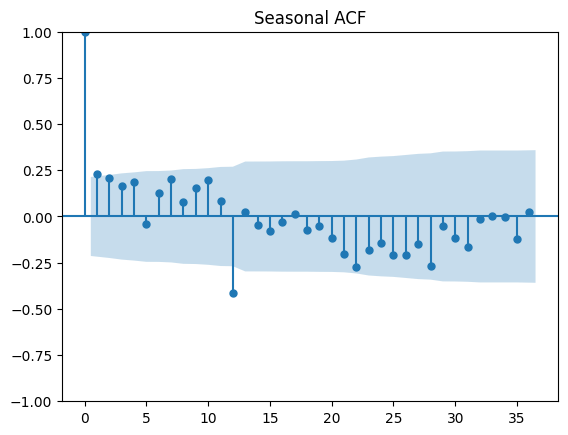

<Figure size 1200x500 with 0 Axes>

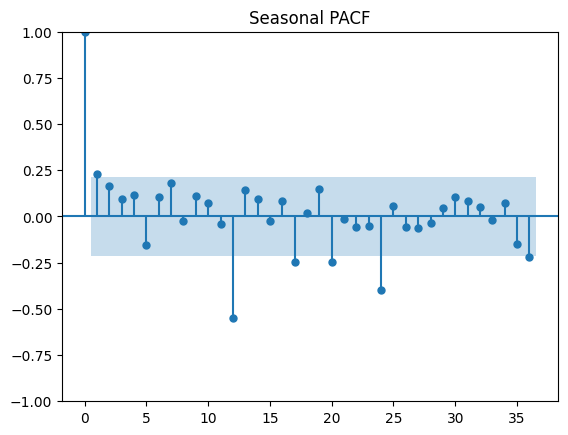

In [ ]:
plt.figure(figsize=(12,5))
plot_acf(final_series, lags=3*s)
plt.title("Seasonal ACF")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(final_series, lags=3*s)
plt.title("Seasonal PACF")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
train_data = series.iloc[:-12]
test_data = series.iloc[-12:]

In [ ]:
model = SARIMAX(train_data,
                order=(4, 1, 0),
                seasonal_order=(1, 1, 1, 12))

model_fit = model.fit(disp=False)

forecast = model_fit.get_forecast(steps=12)
pred_values = forecast.predicted_mean
conf_int = forecast.conf_int()


rmse = np.sqrt(mean_squared_error(test_data, pred_values))
print(f"Model Performance (RMSE): {rmse:.2f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model Performance (RMSE): 315.59


In [ ]:
pred_values

,predicted_mean
2024-01-01,6.512407
2024-02-01,5.643270
2024-03-01,6.186005
2024-04-01,5.216593
2024-05-01,7.617311
2024-06-01,5.401306
2024-07-01,6.621738
2024-08-01,6.438304
2024-09-01,6.510983
2024-10-01,6.443508


In [ ]:
test_data

,Value
Date,
2024-01-01,5.68
2024-02-01,4.56
2024-03-01,5.94
2024-04-01,4.96
2024-05-01,5.33
2024-06-01,4.77
2024-07-01,6.12
2024-08-01,6.65
2024-09-01,8.60


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filename = 'Copper import Forecasting.xlsx'

df = pd.read_excel('Copper import Forecasting.xlsx')
df2 = pd.read_excel('Copper import 2025.xlsx')
df_total = df[df['Country/Region'] == 'Total'].drop(columns=['Country/Region', 'Total'])
df_long = df_total.melt(var_name='Date_Str', value_name='Value')
df_long['Date'] = pd.to_datetime(df_long['Date_Str'], format='%b-%Y')
series = df_long.sort_values('Date').set_index('Date')['Value']

df_total2 = df2[df2['Country/Region'] == 'Total'].drop(columns=['Country/Region', 'Total'])
df_long2 = df_total2.melt(var_name='Date_Str', value_name='Value')
df_long2['Date'] = pd.to_datetime(df_long2['Date_Str'], format='%b-%Y')
series2 = df_long2.sort_values('Date').set_index('Date')['Value']


test_len = 12
train = series
test = series2



In [ ]:
model_raw = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
fit_raw = model_raw.fit(disp=False)
pred_raw = fit_raw.forecast(steps=test_len)
rmse_raw = np.sqrt(mean_squared_error(test, pred_raw))
print(f" Raw RMSE: {rmse_raw:.2f}")

In [ ]:
train_log = np.log(train)

model_log = SARIMAX(train_log, order=(1,1,1), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
fit_log = model_log.fit(disp=False)

# 3. Forecast
pred_log = fit_log.forecast(steps=test_len)

# 4. Inverse Transform (Back to Real Values)
pred_final = np.exp(pred_log)

# 5. Calculate New RMSE
rmse_log = np.sqrt(mean_squared_error(test, pred_final))
print(f" Log-Transformed RMSE: {rmse_log:.2f}")
print(f" Error Reduction: {rmse_raw - rmse_log:.2f} points ({(rmse_raw - rmse_log)/rmse_raw*100:.1f}%)")

In [ ]:

import pandas as pd
import numpy as np

def preprocess_with_mad(series, threshold=3):
    
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    lower_limit = median - threshold * mad
    upper_limit = median + threshold * mad

    
    return series.clip(lower_limit, upper_limit)


series_clean = preprocess_with_mad(series)


series_smooth = series_clean.rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')

In [ ]:
series

,Value
Date,
2017-01-01,580.20
2017-02-01,677.53
2017-03-01,448.19
2017-04-01,639.47
2017-05-01,680.15
...,...
2024-08-01,1518.36
2024-09-01,1252.22
2024-10-01,1529.28


In [ ]:

from statsmodels.tsa.seasonal import STL


stl = STL(series_smooth, period=12)
res = stl.fit()

df_features = pd.DataFrame({
    'Actual': series_smooth,
    'Trend': res.trend,
    'Seasonal': res.seasonal,
    'Remainder': res.resid
})

for lag in range(1, 7):
    df_features[f'lag_{lag}'] = df_features['Actual'].shift(lag)

df_features = df_features.replace(np.nan , 0)

In [ ]:

series_clean2 = preprocess_with_mad(series2)


series_smooth2 = series_clean2.rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')

stl = STL(series_smooth2, period=12)
res = stl.fit()
df_features2 = pd.DataFrame({
    'Actual': series_smooth2,
    'Trend': res.trend,
    'Seasonal': res.seasonal,
    'Remainder': res.resid
})


for lag in range(1, 7):
    df_features2[f'lag_{lag}'] = df_features2['Actual'].shift(lag)



In [ ]:
df_features2 = df_features2.replace(np.nan,0)

In [ ]:
df_features2.head()

,Actual,Trend,Seasonal,Remainder,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,,,
2025-01-01,1132.851667,1333.768611,-200.916944,2.273737e-13,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2025-02-01,1132.851667,1333.768611,-200.916944,2.273737e-13,1132.851667,0.000000,0.000000,0.000000,0.0,0.0
2025-03-01,1203.615000,1333.768611,-130.153611,2.273737e-13,1132.851667,1132.851667,0.000000,0.000000,0.0,0.0
2025-04-01,1323.156667,1333.768611,-10.611944,2.273737e-13,1203.615000,1132.851667,1132.851667,0.000000,0.0,0.0
2025-05-01,1440.843333,1333.768611,107.074722,0.000000e+00,1323.156667,1203.615000,1132.851667,1132.851667,0.0,0.0


In [ ]:
# --- HYBRID SARIMAX + GBM MODEL ---
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor #

# 1. Train SARIMAX on Training Data
train_data = df_features.iloc[:-12]
test_data = df_features2

sarima_model = SARIMAX(train_data['Actual'], order=(1,1,1), seasonal_order=(1,0,1,12))
sarima_fit = sarima_model.fit(disp=False)

# 2. Calculate Training Residuals
train_preds_linear = sarima_fit.fittedvalues
residuals = train_data['Actual'] - train_preds_linear

# 3. Train GBM to predict the residuals (Non-linear correction)
gbm_features = ['Trend', 'Seasonal', 'lag_1', 'lag_2', 'lag_3']
gbm_model = XGBRegressor(n_estimators=25, learning_rate=1.5, max_depth=3)
gbm_model.fit(train_data[gbm_features], train_data['Actual'])

# 4. Hybrid Forecast (Linear + Non-Linear)
sarima_forecast = sarima_fit.forecast(steps=12)
gbm_residual_correction = gbm_model.predict(test_data[gbm_features])

final_hybrid_forecast = gbm_residual_correction

In [ ]:
np.sqrt(mean_squared_error(test_data["Actual"],final_hybrid_forecast))

np.float64(330.0219140810388)

In [ ]:
final_hybrid_forecast

array([ 967.9345,  970.4012,  985.4184, 1020.1887, 1069.6803, 1097.8811,
       1117.2476, 1165.3234, 1075.1133, 1081.9291, 1054.3389, 1054.3389],
      dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
test_data

,Actual,Trend,Seasonal,Remainder,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,,,
2024-01-01,933.990000,1067.955821,-106.087140,-27.878681,941.920000,1002.830000,1028.170000,1044.370000,1048.573333,1030.886667
2024-02-01,1021.540000,1085.239849,-45.274884,-18.424965,933.990000,941.920000,1002.830000,1028.170000,1044.370000,1048.573333
2024-03-01,1047.466667,1102.919757,-22.307385,-33.145705,1021.540000,933.990000,941.920000,1002.830000,1028.170000,1044.370000
2024-04-01,1123.801667,1120.531572,56.709604,-53.439509,1047.466667,1021.540000,933.990000,941.920000,1002.830000,1028.170000
2024-05-01,1172.556667,1138.165711,61.884281,-27.493326,1123.801667,1047.466667,1021.540000,933.990000,941.920000,1002.830000
2024-06-01,1258.253333,1155.935960,115.891187,-13.573814,1172.556667,1123.801667,1047.466667,1021.540000,933.990000,941.920000
2024-07-01,1258.253333,1173.920518,82.552737,1.780078,1258.253333,1172.556667,1123.801667,1047.466667,1021.540000,933.990000
2024-08-01,1244.025000,1192.169131,46.680966,5.174902,1258.253333,1258.253333,1172.556667,1123.801667,1047.466667,1021.540000
2024-09-01,1280.676667,1210.709849,45.176569,24.790249,1244.025000,1258.253333,1258.253333,1172.556667,1123.801667,1047.466667


In [ ]:
train_data

,Actual,Trend,Seasonal,Remainder,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,,,
2017-07-01,691.513333,687.817630,-1.149278,4.844981,676.790000,640.210000,589.270000,588.396667,568.640000,568.640000
2017-08-01,721.523333,695.406523,3.253001,22.863809,691.513333,676.790000,640.210000,589.270000,588.396667,568.640000
2017-09-01,750.563333,702.605233,11.740766,36.217334,721.523333,691.513333,676.790000,640.210000,589.270000,588.396667
2017-10-01,791.076667,709.478476,34.026719,47.571472,750.563333,721.523333,691.513333,676.790000,640.210000,589.270000
2017-11-01,807.393333,716.012264,73.792308,17.588761,791.076667,750.563333,721.523333,691.513333,676.790000,640.210000
...,...,...,...,...,...,...,...,...,...,...
2023-08-01,1048.573333,1015.864701,20.030744,12.677887,1030.886667,1083.091667,1018.811667,1094.938333,957.920000,942.453333
2023-09-01,1044.370000,1024.955926,17.305863,2.108212,1048.573333,1030.886667,1083.091667,1018.811667,1094.938333,957.920000
2023-10-01,1028.170000,1034.096452,-7.242578,1.316126,1044.370000,1048.573333,1030.886667,1083.091667,1018.811667,1094.938333


In [ ]:
np.sqrt(mean_squared_error(test_data["Actual"],final_hybrid_forecast))

np.float64(278.79238244752423)

In [ ]:
# --- GRID SEARCH FOR GBM TUNING ---
from sklearn.model_selection import GridSearchCV

# Systematic evaluation of hyperparameter values [cite: 313]
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [25,50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose =3)
grid_search.fit(train_data[gbm_features], residuals)

best_gbm = grid_search.best_estimator_
print(f"Optimal Configuration: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-19419.108 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-4321.251 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-2750.401 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-19422.998 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-8890.022 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-2725.345 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=-19172.237 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=-20515.987 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=-2779.099 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_d

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error

In [78]:
def load_series(filename):
    df = pd.read_excel(filename)
    df_total = df[df['Country/Region'] == 'Total'].drop(columns=['Country/Region', 'Total'])
    df_long = df_total.melt(var_name='Date_Str', value_name='Value')
    df_long['Date'] = pd.to_datetime(df_long['Date_Str'], format='%b-%Y')
    return df_long.sort_values('Date').set_index('Date')['Value']

In [79]:
train_series = load_series('Copper import Forecasting.xlsx')
test_series = load_series('Copper import 2025.xlsx')

In [80]:
test_series = test_series[test_series > 0]

In [81]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_values = train_series.values.reshape(-1, 1)
scaler.fit(np.vstack([train_values, [[2000]]]))

MinMaxScaler()

In [82]:
scaled_train = scaler.transform(train_values)

In [ ]:
SEQ_LENGTH = 6 

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [84]:
X_train, y_train = create_dataset(scaled_train, SEQ_LENGTH)
X_train = np.reshape(X_train, (X_train.shape[0], SEQ_LENGTH, 1))

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(200, return_sequences=True), input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')

lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

In [87]:
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=2, callbacks=[early_stop, lr_reduce])

Epoch 1/200
12/12 - 6s - 464ms/step - loss: 0.0439 - learning_rate: 1.0000e-03
Epoch 2/200
12/12 - 1s - 50ms/step - loss: 0.0145 - learning_rate: 1.0000e-03
Epoch 3/200
12/12 - 1s - 45ms/step - loss: 0.0123 - learning_rate: 1.0000e-03
Epoch 4/200
12/12 - 0s - 36ms/step - loss: 0.0107 - learning_rate: 1.0000e-03
Epoch 5/200
12/12 - 0s - 26ms/step - loss: 0.0108 - learning_rate: 1.0000e-03
Epoch 6/200
12/12 - 0s - 26ms/step - loss: 0.0096 - learning_rate: 1.0000e-03
Epoch 7/200
12/12 - 0s - 25ms/step - loss: 0.0090 - learning_rate: 1.0000e-03
Epoch 8/200
12/12 - 0s - 24ms/step - loss: 0.0101 - learning_rate: 1.0000e-03
Epoch 9/200
12/12 - 0s - 25ms/step - loss: 0.0088 - learning_rate: 1.0000e-03
Epoch 10/200
12/12 - 0s - 27ms/step - loss: 0.0088 - learning_rate: 1.0000e-03
Epoch 11/200
12/12 - 0s - 24ms/step - loss: 0.0121 - learning_rate: 1.0000e-03
Epoch 12/200
12/12 - 0s - 25ms/step - loss: 0.0094 - learning_rate: 1.0000e-03
Epoch 13/200
12/12 - 0s - 27ms/step - loss: 0.0113 - learnin

In [88]:
curr_window = scaled_train[-SEQ_LENGTH:]
curr_window = curr_window.reshape(1, SEQ_LENGTH, 1)
predictions = []

for i in range(len(test_series)):
    pred = model.predict(curr_window, verbose=0)[0, 0]
    predictions.append(pred)
    # Update window: remove first, add prediction
    curr_window = np.append(curr_window[:, 1:, :], [[[pred]]], axis=1)

# Inverse Transform
pred_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [89]:
rmse = np.sqrt(mean_squared_error(test_series, pred_inv))
print(f"\n--- Final Results ---")
print(f"Deep Learning RMSE: {rmse:.2f}")


--- Final Results ---
Deep Learning RMSE: 203.65


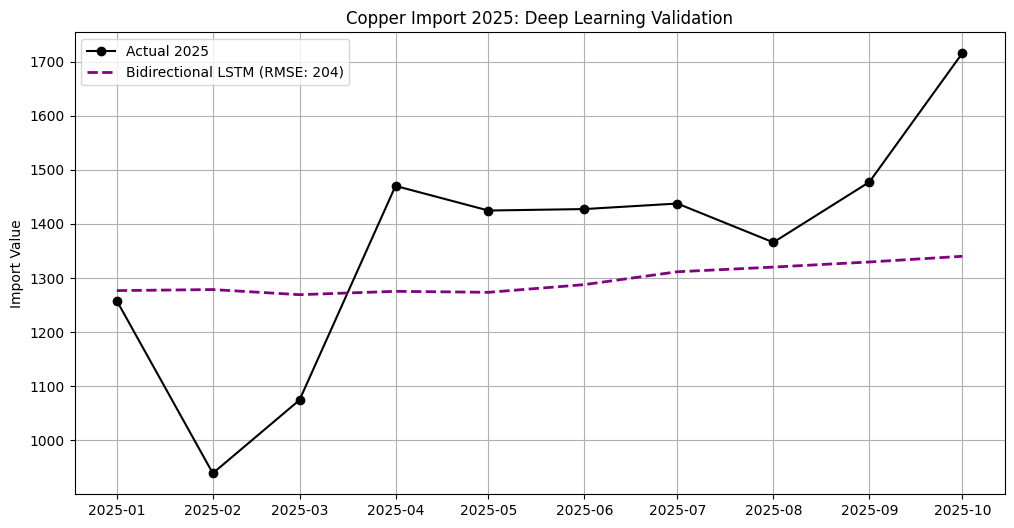

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label='Actual 2025', marker='o', color='black')
plt.plot(test_series.index, pred_inv, label=f'Bidirectional LSTM (RMSE: {rmse:.0f})', linestyle='--', color='purple', linewidth=2)
plt.title('Copper Import 2025: Deep Learning Validation')
plt.ylabel('Import Value')
plt.legend()
plt.grid(True)
# plt.savefig('Copper_DL_Improvement.png')
plt.show()

In [91]:
import pickle

In [92]:
copper_import_file = "Copper_Import_Forecasting.pkl"
with open(copper_import_file,'wb') as file:
  pickle.dump(model,file)

In [93]:
with open(copper_import_file,'rb') as file:
  lstm= pickle.load(file)